# Traitement, Visualisation et Analyse des données

## 1 - Déploiement de l’environnement
Lister les bibliothèques:

In [1]:
pip list

Package                            Version
---------------------------------- -------------------
alabaster                          0.7.12
anaconda-client                    1.7.2
anaconda-navigator                 1.9.12
anaconda-project                   0.8.3
argh                               0.26.2
asn1crypto                         1.3.0
astroid                            2.4.2
astropy                            4.0.1.post1
atomicwrites                       1.4.0
attrs                              19.3.0
autopep8                           1.5.3
Babel                              2.8.0
backcall                           0.2.0
backports.functools-lru-cache      1.6.1
backports.shutil-get-terminal-size 1.0.0
backports.tempfile                 1.0
backports.weakref                  1.0.post1
bcrypt                             3.1.7
beautifulsoup4                     4.9.1
bitarray                           1.4.0
bkcharts                           0.2
bleach                         

## Importation des librairie et des données

In [2]:
#-------- Librairies --------#
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats
import numpy as np


## 2 - Source de données : manipulation

In [3]:
path='./bdd/credit_immo/credit_immo.csv'
df_credit_immo1 = pd.read_csv(path)
df_credit_immo1.head()

,ID_NOM,Niv_Etude_Bac,age,contrat_de_travail,Salaire,dette_anterieure,etat_civile,apport,enfant_a_Charge,Solvable
0,jean,3.0,45,CDI,40000,4000,M,0.3,3.0,OUI
1,VANESSA,5.0,28,CDI,30500,1320,M,0.1,0.0,OUI
2,TARCISSE,0.0,55,CDI,28000,40000,C,0.0,0.0,NON
3,TIBAULT,4.0,23,CDD,15000,0,M,0.1,NaN,OUI
4,GILES,0.0,33,CDD,27000,3000,C,0.1,2.0,NON


In [4]:
path='./bdd/credit_immo/credit_immo.xls'
df_credit_immo2 = pd.read_excel(path)
df_credit_immo2.head()

,ID_NOM,Niv_Etude_Bac,age,contrat_de_travail,Salaire,dette_anterieure,etat_civile,apport,enfant_a_Charge,Solvable
0,jean,3.0,45,CDI,40000,4000,M,0.3,3.0,OUI
1,VANESSA,5.0,28,CDI,30500,1320,M,0.1,0.0,OUI
2,TARCISSE,0.0,55,CDI,28000,40000,C,0.0,0.0,NON
3,TIBAULT,4.0,23,CDD,15000,0,M,0.1,NaN,OUI
4,GILES,0.0,33,CDD,27000,3000,C,0.1,2.0,NON


In [5]:
path='./bdd/credit_immo/credit_immo.json'
df_credit_immo3 = pd.read_json(path)
df_credit_immo3.head()

,Salaire,ID_NOM,dette_anterieure,apport,contrat_de_travail,enfant_a_Charge,etat_civile,Solvable,age,Niv_Etude_Bac
0,40000,jean,4000,0.3,CDI,3,M,OUI,45,3
1,30500,VANESSA,1320,0.1,CDI,0,M,OUI,28,5
2,28000,TARCISSE,40000,0.0,CDI,0,C,NON,55,0
3,15000,TIBAULT,0,0.1,CDD,,M,OUI,23,4
4,27000,GILES,3000,0.1,CDD,2,C,NON,33,0


In [6]:
list= []
for i in range(0, 6):
    list.append(np.random.randint(1, 10, 4))
ar = np.array(list)
ar

array([[7, 3, 8, 7],
       [9, 2, 6, 3],
       [3, 3, 1, 5],
       [7, 5, 9, 5],
       [9, 3, 9, 9],
       [8, 4, 8, 8]])

In [7]:
df1 = pd.DataFrame(ar, index=[0, 1, 2, 3, 4, 5], columns = ['taux_de_ventes', 'croissance_vente', 'ratio_benefice', 'ratio_perte'])
df1

,taux_de_ventes,croissance_vente,ratio_benefice,ratio_perte
0,7,3,8,7
1,9,2,6,3
2,3,3,1,5
3,7,5,9,5
4,9,3,9,9
5,8,4,8,8


In [8]:
df1 = df1.reindex([0,1, 2, 3, 4, 5, 6])

In [9]:
df1.isnull()

,taux_de_ventes,croissance_vente,ratio_benefice,ratio_perte
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,True,True,True,True


In [10]:
df2 = df1.fillna(0)
df2

,taux_de_ventes,croissance_vente,ratio_benefice,ratio_perte
0,7.0,3.0,8.0,7.0
1,9.0,2.0,6.0,3.0
2,3.0,3.0,1.0,5.0
3,7.0,5.0,9.0,5.0
4,9.0,3.0,9.0,9.0
5,8.0,4.0,8.0,8.0
6,0.0,0.0,0.0,0.0


In [11]:
df1.dropna()

,taux_de_ventes,croissance_vente,ratio_benefice,ratio_perte
0,7.0,3.0,8.0,7.0
1,9.0,2.0,6.0,3.0
2,3.0,3.0,1.0,5.0
3,7.0,5.0,9.0,5.0
4,9.0,3.0,9.0,9.0
5,8.0,4.0,8.0,8.0


## 3 - Traitement des données

In [12]:
from sklearn.impute import SimpleImputer
df_credit_immo1.head()

,ID_NOM,Niv_Etude_Bac,age,contrat_de_travail,Salaire,dette_anterieure,etat_civile,apport,enfant_a_Charge,Solvable
0,jean,3.0,45,CDI,40000,4000,M,0.3,3.0,OUI
1,VANESSA,5.0,28,CDI,30500,1320,M,0.1,0.0,OUI
2,TARCISSE,0.0,55,CDI,28000,40000,C,0.0,0.0,NON
3,TIBAULT,4.0,23,CDD,15000,0,M,0.1,NaN,OUI
4,GILES,0.0,33,CDD,27000,3000,C,0.1,2.0,NON


In [13]:
df_credit_immo1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID_NOM              19 non-null     object 
 1   Niv_Etude_Bac       18 non-null     float64
 2   age                 19 non-null     int64  
 3   contrat_de_travail  19 non-null     object 
 4   Salaire             19 non-null     int64  
 5   dette_anterieure    19 non-null     int64  
 6   etat_civile         19 non-null     object 
 7   apport              19 non-null     float64
 8   enfant_a_Charge     18 non-null     float64
 9   Solvable            19 non-null     object 
dtypes: float64(3), int64(3), object(4)
memory usage: 1.6+ KB


In [14]:
#recherche des NaN pour contrôle
df_credit_immo1.isna().sum()

ID_NOM                0
Niv_Etude_Bac         1
age                   0
contrat_de_travail    0
Salaire               0
dette_anterieure      0
etat_civile           0
apport                0
enfant_a_Charge       1
Solvable              0
dtype: int64

In [15]:
col_num = df_credit_immo1.select_dtypes(exclude=['object']).columns
col_num

Index(['Niv_Etude_Bac', 'age', 'Salaire', 'dette_anterieure', 'apport',
       'enfant_a_Charge'],
      dtype='object')

In [16]:
#Transformer les valeurs manquantes en moyenne (SimpleImputer).
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(df_credit_immo1[col_num])
df_credit_immo1[col_num] = imp.transform(df_credit_immo1[col_num])

In [17]:
df_credit_immo1

,ID_NOM,Niv_Etude_Bac,age,contrat_de_travail,Salaire,dette_anterieure,etat_civile,apport,enfant_a_Charge,Solvable
0,jean,3.000000,45.0,CDI,40000.0,4000.0,M,0.3,3.000000,OUI
1,VANESSA,5.000000,28.0,CDI,30500.0,1320.0,M,0.1,0.000000,OUI
2,TARCISSE,0.000000,55.0,CDI,28000.0,40000.0,C,0.0,0.000000,NON
3,TIBAULT,4.000000,23.0,CDD,15000.0,0.0,M,0.1,1.333333,OUI
4,GILES,0.000000,33.0,CDD,27000.0,3000.0,C,0.1,2.000000,NON
5,ETHAN,0.000000,41.0,INTERIM,40000.0,1000.0,M,0.0,4.000000,NON
6,LILIANE,-1.000000,29.0,CDI,50000.0,3000.0,C,0.0,0.000000,NON
7,GLODI,-3.000000,24.0,INTERIM,29000.0,5000.0,C,0.0,0.000000,NON
8,FLORIANE,1.444444,26.0,CDI,44000.0,0.0,M,0.1,1.000000,OUI
9,MARIE,3.000000,37.0,CDI,45800.0,2000.0,M,0.2,2.000000,OUI


In [18]:
#contrôle de la transformation des NaN
df_credit_immo1.isna().sum()

ID_NOM                0
Niv_Etude_Bac         0
age                   0
contrat_de_travail    0
Salaire               0
dette_anterieure      0
etat_civile           0
apport                0
enfant_a_Charge       0
Solvable              0
dtype: int64

In [19]:
# EXEMPLE SUR UNE COLONNE - Transformer les valeurs manquantes en moyenne (SimpleImputer).
#imp = SimpleImputer(missing_values=np.nan, strategy='mean')
#imp = imp.fit(df_credit_immo1[['enfant_a_Charge']])
#df_credit_immo1['enfant_a_Charge'] = imp.transform(df_credit_immo1[['enfant_a_Charge']]).ravel()
#df_credit_immo1.head()

In [20]:
#Encoder les valeurs catégoriques (LabelEncoder).
from sklearn import preprocessing

In [21]:
#selection des colonnes de type Object
col_object = df_credit_immo1.select_dtypes(include=['object'])
#affichage des trois premières colonnes
col_object = col_object.iloc[:,1:4]
col_object

,contrat_de_travail,etat_civile,Solvable
0,CDI,M,OUI
1,CDI,M,OUI
2,CDI,C,NON
3,CDD,M,OUI
4,CDD,C,NON
5,INTERIM,M,NON
6,CDI,C,NON
7,INTERIM,C,NON
8,CDI,M,OUI
9,CDI,M,OUI


In [22]:
le = preprocessing.LabelEncoder()
le.fit(df_credit_immo1['etat_civile'])
df_credit_immo1['etat_civile'] = le.transform(df_credit_immo1['etat_civile'])
df_credit_immo1

,ID_NOM,Niv_Etude_Bac,age,contrat_de_travail,Salaire,dette_anterieure,etat_civile,apport,enfant_a_Charge,Solvable
0,jean,3.000000,45.0,CDI,40000.0,4000.0,1,0.3,3.000000,OUI
1,VANESSA,5.000000,28.0,CDI,30500.0,1320.0,1,0.1,0.000000,OUI
2,TARCISSE,0.000000,55.0,CDI,28000.0,40000.0,0,0.0,0.000000,NON
3,TIBAULT,4.000000,23.0,CDD,15000.0,0.0,1,0.1,1.333333,OUI
4,GILES,0.000000,33.0,CDD,27000.0,3000.0,0,0.1,2.000000,NON
5,ETHAN,0.000000,41.0,INTERIM,40000.0,1000.0,1,0.0,4.000000,NON
6,LILIANE,-1.000000,29.0,CDI,50000.0,3000.0,0,0.0,0.000000,NON
7,GLODI,-3.000000,24.0,INTERIM,29000.0,5000.0,0,0.0,0.000000,NON
8,FLORIANE,1.444444,26.0,CDI,44000.0,0.0,1,0.1,1.000000,OUI
9,MARIE,3.000000,37.0,CDI,45800.0,2000.0,1,0.2,2.000000,OUI


In [23]:
le = preprocessing.LabelEncoder()
le.fit(col_object['contrat_de_travail'])
a = le.classes_
le.transform(col_object['contrat_de_travail'])

array([1, 1, 1, 0, 0, 3, 1, 3, 1, 1, 1, 0, 3, 1, 0, 2, 1, 1, 1])

In [24]:
for i in col_object.columns:
    le = preprocessing.LabelEncoder()
    le.fit(df_credit_immo1[i])
    df_credit_immo1[i] = le.transform(df_credit_immo1[i])

df_credit_immo1.head()

,ID_NOM,Niv_Etude_Bac,age,contrat_de_travail,Salaire,dette_anterieure,etat_civile,apport,enfant_a_Charge,Solvable
0,jean,3.0,45.0,1,40000.0,4000.0,1,0.3,3.000000,1
1,VANESSA,5.0,28.0,1,30500.0,1320.0,1,0.1,0.000000,1
2,TARCISSE,0.0,55.0,1,28000.0,40000.0,0,0.0,0.000000,0
3,TIBAULT,4.0,23.0,0,15000.0,0.0,1,0.1,1.333333,1
4,GILES,0.0,33.0,0,27000.0,3000.0,0,0.1,2.000000,0


In [25]:
# Fractionner le jeu de données pour l’entrainement et le test(Training and Test set)
from sklearn.model_selection import train_test_split

X = df_credit_immo1.iloc[:, 1:-1]
y = df_credit_immo1['Solvable']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
len(X_train)

15

In [26]:
len(X_test)

4

In [27]:
# Mise à l’échelle des features (StandardScaler)
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()
scaler.fit(X_train)
scaler.mean_
scaler.transform(X_train)

array([[-0.49439096,  0.38330997,  0.97991187,  1.62922362,  0.45360056,
         0.70710678,  0.53452248, -0.9304804 ],
       [ 0.88887909, -1.17730921, -1.28142321, -1.46994513, -0.57443418,
         0.70710678, -0.26726124,  0.28318969],
       [-0.84020848, -0.6844821 , -0.15075567,  0.50225316, -0.45581479,
        -1.41421356, -1.06904497, -0.9304804 ],
       [ 0.00512322, -0.93089565, -0.15075567,  0.16416203, -0.57443418,
         0.70710678, -0.26726124, -0.02022783],
       [ 2.27214915,  0.71186138, -0.15075567,  2.19270884, -0.2581158 ,
         0.70710678, -1.06904497,  1.8002773 ],
       [ 0.54306158, -0.02737928, -0.15075567,  0.26558937, -0.49535458,
         0.70710678,  0.53452248,  0.89002473],
       [-0.49439096,  1.45110205, -0.15075567, -0.73741433,  1.00715772,
        -1.41421356, -1.06904497, -0.9304804 ],
       [-1.53184351,  0.13689642,  2.11057941, -0.68106581, -0.38068917,
         0.70710678, -1.06904497, -0.02022783],
       [-0.49439096, -0.52020639

In [29]:
X_train = scaler.fit_transform(X_train)
X_train[:, 1].mean()

-1.905882858939852e-16

In [30]:
X_test = scaler.fit_transform(X_test)
X_test[:, 1].std()

1.0

## 4 - Visualisation des données

In [31]:
path='./bdd/montant_temps.csv'
montant_temps = pd.read_csv(path)
montant_temps.head()

,Montant_du_capitale,Temps
0,1,5
1,12,6
2,13,7
3,2,8
4,3,9


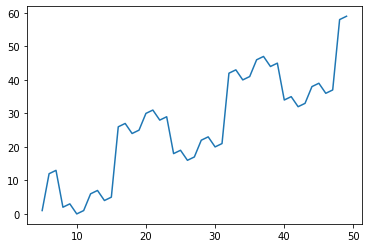

In [32]:
x = montant_temps.iloc[:, 1]
y = montant_temps.iloc[:, 0]

#plot
fig, ax = plt.subplots()

graph1 = ax.plot(x, y)
plt.savefig("graph1.png")
plt.show()

### 4.1 - Style du graphique

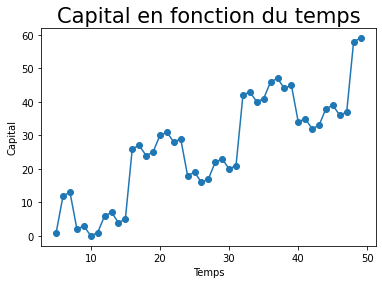

In [91]:
fig, ax = plt.subplots()

ax.plot(x, y,  'o-')
plt.savefig("graph_capital-f-temps.png")
ax.set_xlabel('Temps')
ax.set_ylabel('Capital')
ax.set_title("Capital en fonction du temps", fontsize=21)
plt.show()

### 4.2 - Visualisation de données sous forme de nuage de points

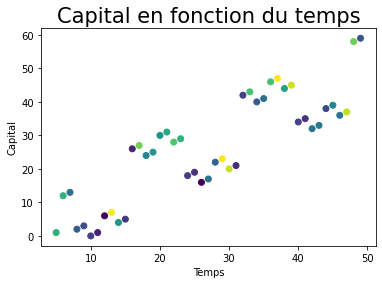

In [51]:
#color
colors = np.random.uniform(15, 80, len(x))
#plot
fig, ax = plt.subplots()

ax.scatter(x, y, c = colors)
ax.set_xlabel('Temps')
ax.set_ylabel('Capital')
ax.set_title("Capital en fonction du temps", fontsize=21)
plt.show()

## 5 - Analyse de données

In [35]:
path='./bdd/tendance_centrale.csv'
tendance_centrale = pd.read_csv(path)
tendance_centrale.head()

,Nom,Age,Rating
0,ANATOLE,55,4.53
1,Vincent,59,3.54
2,Brenda,55,3.98
3,Philippe,53,5.59
4,Michel,30,3.50


### 5.1 - Mesure de tendance centrale
Mesure de tendance centrale est le nombre qui caractérise le centre d’une distribution et la position des diverses valeurs de la distribution par rapport à ce centre. Il s’agit ici de calculer la moyenne, le médiane et le mode d’une distribution. 
* Vous avez à disposition le fichier nommé tendance_centrale.csv. 
* Chargez ces données puis en utilisant les outils nécessaires 
* Appliquez la mesure de tendance centrale sur ces données.

In [36]:
var_num = tendance_centrale.iloc[:, 1:]

In [37]:
#Moyenne
a = f"La moyenne de l'age est: {var_num['Age'].mean()} ans et la moyenne du rating est: {var_num['Rating'].mean()}"
print(a)

La moyenne de l'age est: 45.64705882352941 ans et la moyenne du rating est: 4.438823529411764


In [38]:
#Moyenne
var_num.mean()

Age       45.647059
Rating     4.438824
dtype: float64

In [39]:
#Médiane
var_num.median()

Age       49.0
Rating     4.3
dtype: float64

In [40]:
#Mode de l'âge
stats.mode(var_num)

ModeResult(mode=array([[53.  ,  3.78]]), count=array([[4, 2]]))

### 5.2 - Analyse de la variance
En statistique, l’analyse de la variance est un modèle statistique utilisé pour comparer les moyennes d’échantillons. Ce test s’applique lorsque l’on mesure une ou plusieurs variables explicatives catégorielle (appelées alors facteurs de variabilité, leurs différentes modalités étant parfois appelées « niveaux ») qui ont de l’influence sur la loi d’une variable continue à expliquer. 

* Faites une analyse de variance sur le jeu de données issu de tendance_centrale.csv.


<i>Récupération du travail de Perrine suite à la journée en commun et réinterpretation</i>



In [57]:
#Anova
from scipy.stats import f_oneway
liste_tc = []
#regrouper les ages similaires
a = tendance_centrale['Age'].unique()
#et créer la liste de listes permettant d'execuater Anova
for i in tendance_centrale['Age'].unique():
    a = tendance_centrale[tendance_centrale["Age"] == i]['Rating']
    liste_tc.append(a.to_list())

anova = f_oneway(*liste_tc)
print(liste_tc)
print("===================")
print(anova)
print("===================")
print(f"On accepte l'hypothèse nulle, les moyennes sont similaires entre les groupes d'âges (la p-value = {round(anova[1], 3)} > 0.05)")


[[4.53, 3.98], [3.54, 4.9], [5.59, 3.8, 4.3, 4.3], [3.5, 4.8, 4.8], [3.78, 3.78], [5.98, 5.98], [3.95, 3.95]]
F_onewayResult(statistic=2.6464342372301703, pvalue=0.08370350483249943)
On accepte l'hypothèse nulle, les moyennes sont similaires entre les groupes d'âges (la p-value = 0.084 > 0.05)


In [58]:
a = tendance_centrale.groupby('Age')['Rating'].apply(lambda x: x.to_list()).to_list()
moyennes = []
ssws = []
ssbs = []
for group in a:
    moyenne = np.mean(group)
    #calcul SSW:
    ssw = sum([(val-moyenne)**2 for val in group])     
    #ajout de la moyenne à la liste moyennes
    moyennes.append(moyenne)
    
moy_g = np.mean(moyennes)
tendance_centrale

,Nom,Age,Rating
0,ANATOLE,55,4.53
1,Vincent,59,3.54
2,Brenda,55,3.98
3,Philippe,53,5.59
4,Michel,30,3.50
5,Tillier,59,4.90
6,Blanchard,53,3.80
7,perez,34,3.78
8,théo,40,5.98
9,cyprien,30,4.80


### 5.3 - Analyse de corrélations
L’objectif de l’analyse de corrélation est étudier la liaison entre deux variables quantitative. Soient X et Y deux grandeurs statistiques quantitatives observées. On souhaite :
<p>
Déterminer s’il existe une relation entre X et Y .
Caractériser la forme de la liaison(la relation) entre X et Y (positive ou négative,linéaire ou non linéaire,monotone ou non monotone)
</p>

* Tester si la liaison est statistiquement significative
* Quantifier l’intensité de la liaison

Utlilisez le jeu de données (iris.csv)


In [69]:
path_iris = "bdd/iris.csv"
df_iris = pd.read_csv(path_iris)
df_iris.head(10)

,longueur_sepal,largeur_sepal,longueur_petal,largeur_petal,espece
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


#### 5.3.2 - Analyse graphique :

L’analyse graphique est une bonne manière de comprendre les différentes caractéristiques énumérées ci-dessus. Le graphique "nuage de points" est l’outil privilégié. Nous plaçons en abscisse la variable X, en ordonnée la variable Y, chaque observation est positionnée dans le repère ainsi constitué. L’intérêt est multiple : nous pouvons situer les proximités entre les individus;

* Etudier la forme globale des points, voir notamment s’il existe une forme de liaison ou de régularité;
* Détecter visuellement les points qui s’écartent des autres, les observations atypiques;
* Vérifier s’il n’y a pas de regroupement suspects, laissant entendre qu’il y a en réalité une troisième variable qui influence le positionnement des individus. . .
* A partir de la base de données qui vous est fournie, illustrez quelques types de liaisons qui peuvent exister entre 2 variables.

* Utlilisez le jeu de données (iris.csv)

### Pétales et espèces

Text(0.5, 1.0, 'Longueur des pétales en fonction des espèces')

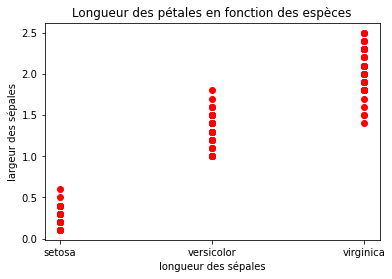

In [73]:
#Données
x_sepal = df_iris['espece']
y_sepal = df_iris['largeur_petal']

#plot 1 - Sepal
fig, ax = plt.subplots()

ax.scatter(x_sepal, y_sepal, c = 'red')
ax.set_xlabel('longueur des sépales')
ax.set_ylabel('largeur des sépales')
ax.set_title('Longueur des pétales en fonction des espèces')

### Sépales et espèces

Text(0.5, 1.0, 'Longueur des pétales en fonction des espèces')

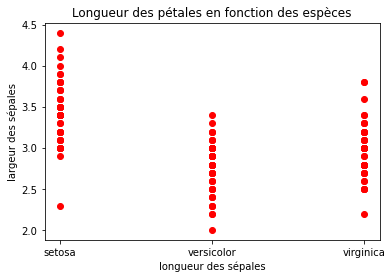

In [74]:
#Données
x_sepal = df_iris['espece']
y_sepal = df_iris['largeur_sepal']

#plot 1 - Sepal
fig, ax = plt.subplots()

ax.scatter(x_sepal, y_sepal, c = 'red')
ax.set_xlabel('longueur des sépales')
ax.set_ylabel('largeur des sépales')
ax.set_title('Longueur des pétales en fonction des espèces')

### Comparaisons sépales / pétales

Text(0.5, 1.0, 'Largeur des sépales en fonction de leurs longueurs')

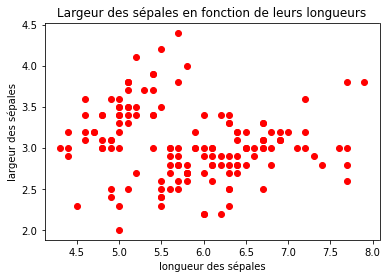

In [83]:
#Données
x_sepal = df_iris['longueur_sepal']
y_sepal = df_iris['largeur_sepal']

#plot 1 - Sepal
fig, ax = plt.subplots()

ax.scatter(x_sepal, y_sepal, c = 'red')
ax.set_xlabel('longueur des sépales')
ax.set_ylabel('largeur des sépales')
ax.set_title('Largeur des sépales en fonction de leurs longueurs')

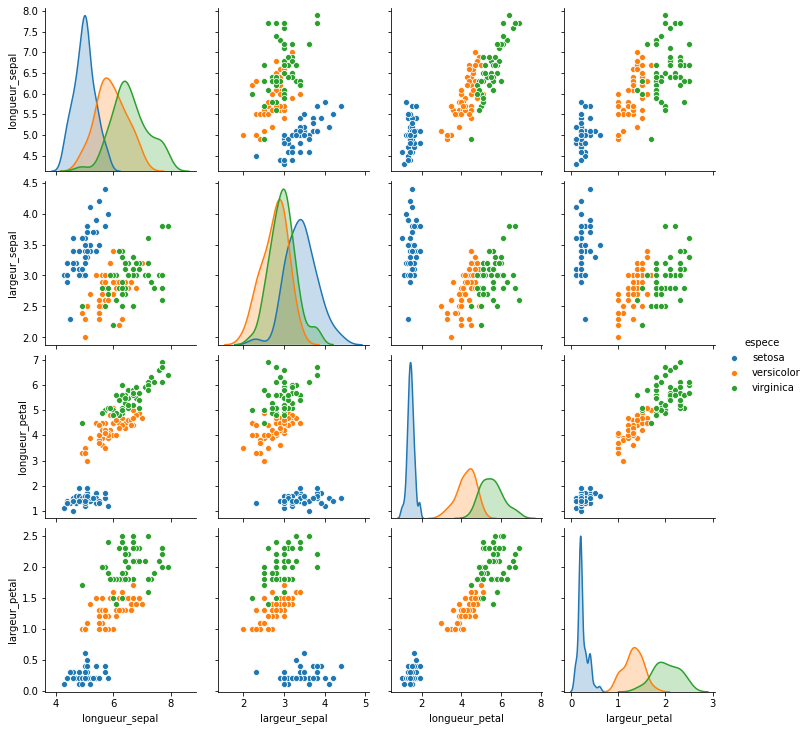

In [92]:
import seaborn as sns
sns.pairplot(df_iris, hue='espece')

### 5.3.3 - Analyse mathématique :
coefficient de corrélation de Pearson Le coefficient de corrélation linéaire simple, dit de Bravais-Pearson(ou de Pearson), est une normalisation de la covariance par le produit des écarts-type des variables :

**r(x,y )= COV(X,Y) / (E(X) x E(Y))**

* Avec les outils et bibliothèques de Python, calculez le coefficient de corrélation de Pearson sur la base de données fournie et interprétez les résultats.
* Utlilisez le jeu de données (iris.csv)


In [84]:
result1 = stats.pearsonr(x_sepal, y_sepal)
print(f"Il n'existe pas de corrélation entre la longueur et la largeur des sépales, le coefficient de corrélation est de r: {round(result1[0], 3)} et une p-value de {round(result1[1], 3)} > 0.05.")

Il n'existe pas de corrélation entre la longueur et la largeur des sépales, le coefficient de corrélation est de r: -0.118 et une p-value de 0.152 > 0.05.


In [85]:
result1_bis = stats.pearsonr(y_sepal, x_sepal)
result1_bis

(-0.11756978413300204, 0.15189826071144918)

##### Corrélation entre la longueur et la largeur des pétales

In [88]:
#Données
x_petal = df_iris['longueur_sepal']
y_petal = df_iris['largeur_sepal']


result2 = stats.pearsonr(x_petal, y_petal)
print(f"Il existe une corrélation positive entre la longueur et la largeur des pétales, le coefficient de corrélation est de r: {round(result2[0], 3)}, avec une p-value de {result2[1]} < 0.05, statistiquement significative.")

Il existe une corrélation positive entre la longueur et la largeur des pétales, le coefficient de corrélation est de r: -0.118, avec une p-value de 0.15189826071144918 < 0.05, statistiquement significative.


In [89]:
result2_bis = stats.pearsonr(y_petal, x_petal)
result2_bis

(-0.11756978413300204, 0.15189826071144918)